/Users/davosli/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/davosli/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


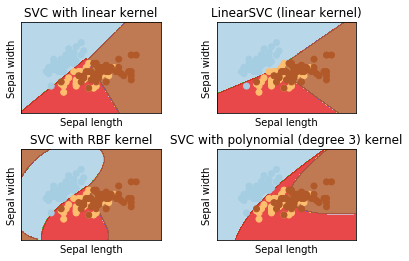

<Figure size 432x288 with 0 Axes>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# 导入数据集
iris = datasets.load_iris()
X = iris.data[:, :2]  # 只取前两维特征
y = iris.target

h = .02  # 网格中的步长

# 创建支持向量机实例，并拟合出数据
C = 1.0  # SVM正则化参数
svc = svm.SVC(kernel='linear', C=C).fit(X, y) # 线性核
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y) # 径向基核
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y) # 多项式核
lin_svc = svm.LinearSVC(C=C).fit(X, y) #线性核

# 创建网格，以绘制图像
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# 图的标题
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # 绘出决策边界，不同的区域分配不同的颜色
    plt.subplot(2, 2, i + 1) # 创建一个2行2列的图，并以第i个图为当前图
    plt.subplots_adjust(wspace=0.4, hspace=0.4) # 设置子图间隔

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #将xx和yy中的元素组成一对对坐标，作为支持向量机的输入，返回一个array

    # 把分类结果绘制出来
    Z = Z.reshape(xx.shape) #(220, 280)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8) #使用等高线的函数将不同的区域绘制出来

    # 将训练数据以离散点的形式绘制出来
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.figure()
plt.show()